# PEOPLE CLASSIFIER USING CNN

# importing necessary libraries

In [99]:
import matplotlib.pyplot as plt
import numpy  as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Images Preprocessing

In [100]:
datagen = ImageDataGenerator(rescale=1/255,rotation_range=30,horizontal_flip=True,zoom_range=0.2)

In [101]:
training_set = datagen.flow_from_directory(r"C:\Users\Lenovo\Desktop\CDAC\M L\CNN project\3 class\train",
                                            target_size =(224,224),
                                            batch_size=10,
                                            class_mode='categorical')

Found 179 images belonging to 3 classes.


In [102]:
test_set = datagen.flow_from_directory(r"C:\Users\Lenovo\Desktop\CDAC\M L\CNN project\3 class\test",
                                        target_size =(224,224),
                                        batch_size=10,
                                        class_mode='categorical')

Found 45 images belonging to 3 classes.


# Creating Model


In [103]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model3.add(MaxPooling2D(2, 2))
model3.add(Conv2D(64, (3, 3)))
model3.add(MaxPooling2D(2, 2))
model3.add(Conv2D(128, (3, 3)))
model3.add(MaxPooling2D(2, 2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(3, activation='softmax'))  

model3.summary()




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

# Model training

In [106]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model3.fit(training_set,epochs=25,validation_data=test_set)

In [107]:
# model3.save('final3.h5')

In [108]:
from tensorflow.keras.preprocessing import image

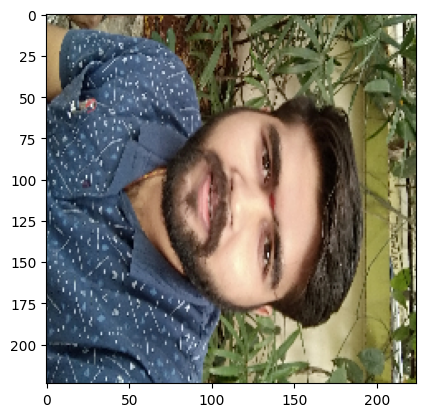

In [ ]:
img=image.load_img(r"path of image",target_size=(224,224))
plt.imshow(img);

In [110]:
test_img = np.array(img)
test_img.shape

(224, 224, 3)

# Importing model


In [111]:
from tensorflow import keras

In [112]:
model_3 = keras.models.load_model(r"C:\Users\Lenovo\Desktop\CDAC\M L\CNN project\final3.h5")

In [97]:
# Accuracy of training set
loss, accuracy = model_3.evaluate(training_set)

18/18 [==============================] - 9s 468ms/step - loss: 0.1834 - accuracy: 0.9274


In [98]:
# Accuracy of test set
loss, accuracy = model_3.evaluate(test_set)

5/5 [==============================] - 2s 446ms/step - loss: 0.3913 - accuracy: 0.9111


# Prediction part

In [113]:
test_img = test_img.reshape(1,224,224,3)
name_array = model_3.predict(test_img)[0]

1/1 [==============================] - 0s 217ms/step


In [114]:
# list of names
cl = ['ANNA','ARUN','NIKHIL']

In [115]:

index = np.argmax(name_array)
name = cl[index]
print("Predicted class:", name)

Predicted class: ANNA
